In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src")

import feature_engineering as fe
import data_preprocessing as dp

In [2]:
path_to_df = "../data/raw/atp_tennis.csv"
path_to_df_processed = "../data/processed/atp_tennis_processed.csv"

df = pd.read_csv(path_to_df)
df_processed = df.copy()

In [ ]:
df_processed = fe.process_features(df_processed)

In [ ]:
df_processed, X_train, y_train, X_test, y_test, label_encoders = dp.preprocess_data(df_processed)

KeyboardInterrupt: 

In [ ]:
# Define numeric columns

numeric_cols = df.select_dtypes(include=np.number).columns

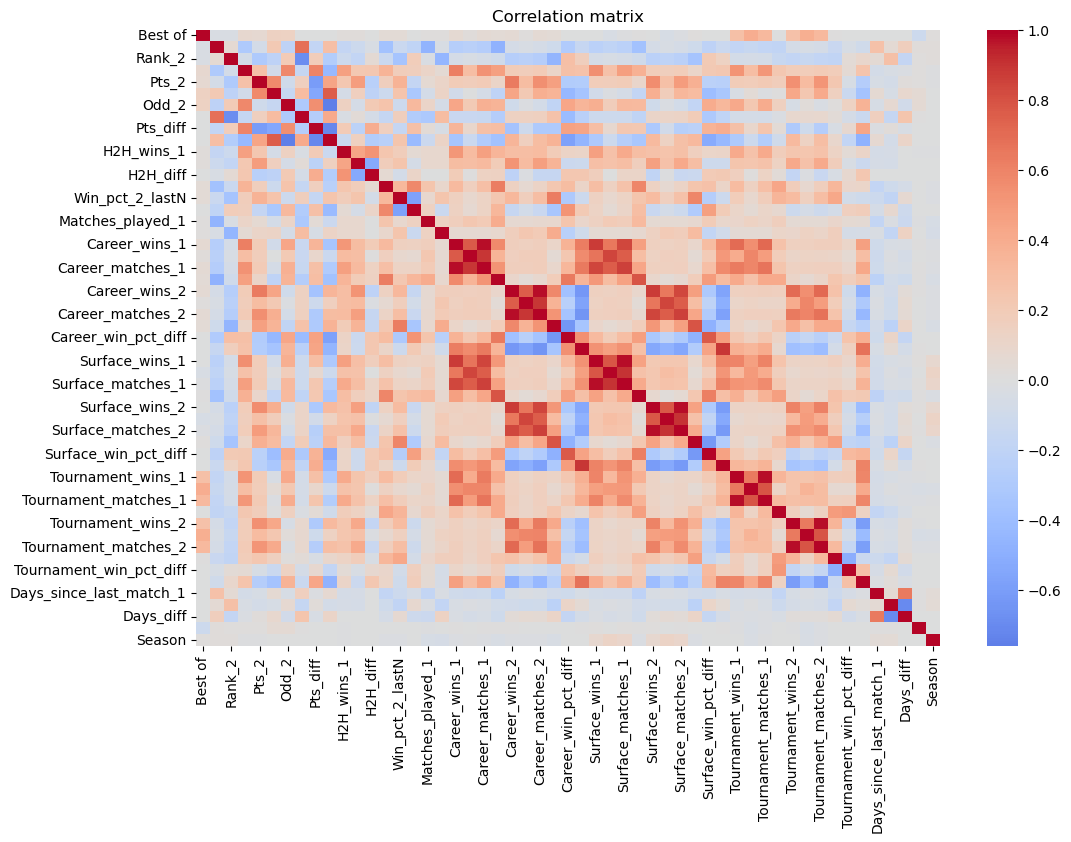

In [ ]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()

In [ ]:
df_processed.to_csv(path_to_df_processed, index=False)